## Read apple_2023_masked.csv

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from datetime import datetime
from sklearn.metrics import mean_squared_error

from statsmodels.tsa.api import VAR
from statsmodels.tsa.stattools import acf, pacf, grangercausalitytests

import yfinance as yf

In [2]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [3]:
nvidia = yf.Ticker("NVDA")
nvda_data = nvidia.history(start='2023-01-01', end='2024-01-01')
nvda_data['Diff'] = nvda_data['Close'].diff()
nvda_data['Daily Return'] = nvda_data['Close'].pct_change()
nvda_data

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Diff,Daily Return
Date,,,,,,,,,
2023-01-03 00:00:00-05:00,148.437176,149.886477,140.890890,143.079803,40127700,0.0,0.0,NaN,NaN
2023-01-04 00:00:00-05:00,145.598564,148.457162,142.340168,147.417679,43132400,0.0,0.0,4.337875,0.030318
2023-01-05 00:00:00-05:00,144.838949,145.568587,141.410623,142.580048,38916800,0.0,0.0,-4.837631,-0.032816
2023-01-06 00:00:00-05:00,144.669033,150.026405,140.271181,148.517136,40504400,0.0,0.0,5.937088,0.041640
2023-01-09 00:00:00-05:00,152.765053,160.481269,151.335762,156.203369,50423100,0.0,0.0,7.686234,0.051753
...,...,...,...,...,...,...,...,...,...
2023-12-22 00:00:00-05:00,491.926922,493.806808,484.647265,488.277069,25213900,0.0,0.0,-1.599945,-0.003266
2023-12-26 00:00:00-05:00,489.657037,495.976748,489.577054,492.766907,24420000,0.0,0.0,4.489838,0.009195
2023-12-27 00:00:00-05:00,495.086748,496.776671,490.826969,494.146820,23364800,0.0,0.0,1.379913,0.002800


In [2]:
data = pd.read_csv("../apple_2023_masked.csv")

NameError: name 'pd' is not defined

In [5]:
data

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,1day,2day,3day,4day,5day
0,2023-01-03 00:00:00-05:00,129.215470,129.830399,123.155395,124.048042,112117500,0.0,0.0,124.048042,124.048042,124.048042,124.048042,124.048042
1,2023-01-04 00:00:00-05:00,125.853183,127.608724,124.057975,125.327515,89113600,0.0,0.0,125.327515,125.327515,125.327515,125.327515,125.327515
2,2023-01-05 00:00:00-05:00,126.091211,126.725981,123.740581,123.998451,80962700,0.0,0.0,123.998451,123.998451,123.998451,123.998451,123.998451
3,2023-01-06 00:00:00-05:00,124.980372,129.225391,123.869520,128.560867,87754700,0.0,0.0,128.560867,128.560867,128.560867,128.560867,128.560867
4,2023-01-09 00:00:00-05:00,129.403910,132.319889,128.828647,129.086517,70790800,0.0,0.0,129.086517,129.086517,129.086517,129.086517,129.086517
...,...,...,...,...,...,...,...,...,...,...,...,...,...
245,2023-12-22 00:00:00-05:00,194.667221,194.896627,192.463035,193.091385,37122800,0.0,0.0,193.091385,193.091385,193.091385,193.091385,193.091385
246,2023-12-26 00:00:00-05:00,193.101342,193.380606,192.323393,192.542816,28919300,0.0,0.0,192.542816,192.542816,192.542816,192.542816,192.542816
247,2023-12-27 00:00:00-05:00,191.984293,192.991634,190.587962,192.642548,48087700,0.0,0.0,192.642548,192.642548,192.642548,192.642548,192.642548
248,2023-12-28 00:00:00-05:00,193.629953,194.148591,192.662500,193.071426,34049900,0.0,0.0,193.071426,193.071426,193.071426,193.071426,193.071426


## Imputing missing 1 data

In [1]:
df1 = data[['Date','Close','1day']].copy()
df1['Date'] = pd.to_datetime(df['date'] + ' ' + df['time'])
df1 = df1.set_index('Date')
df1['NVDA Diff'] = nvda_data['Diff']
df1['NVDA Daily Return'] = nvda_data['Daily Return']
df1

NameError: name 'data' is not defined

In [7]:
data['1day'].isnull().sum()

7

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          250 non-null    object 
 1   Open          250 non-null    float64
 2   High          250 non-null    float64
 3   Low           250 non-null    float64
 4   Close         250 non-null    float64
 5   Volume        250 non-null    int64  
 6   Dividends     250 non-null    float64
 7   Stock Splits  250 non-null    float64
 8   1day          243 non-null    float64
 9   2day          236 non-null    float64
 10  3day          229 non-null    float64
 11  4day          222 non-null    float64
 12  5day          215 non-null    float64
dtypes: float64(11), int64(1), object(1)
memory usage: 25.5+ KB


### Baseline Model: Linear interpolating

In [9]:
df1['Interpolating'] = df1['1day'].interpolate(method='linear')
mses1 = {}
mses1['Linear Interpolating'] = mean_squared_error(df1['Interpolating'],df1['Close'])*(len(df1)/(data['1day'].isnull().sum()))

In [10]:
mses1

{'Linear Interpolating': 0.679228361280242}

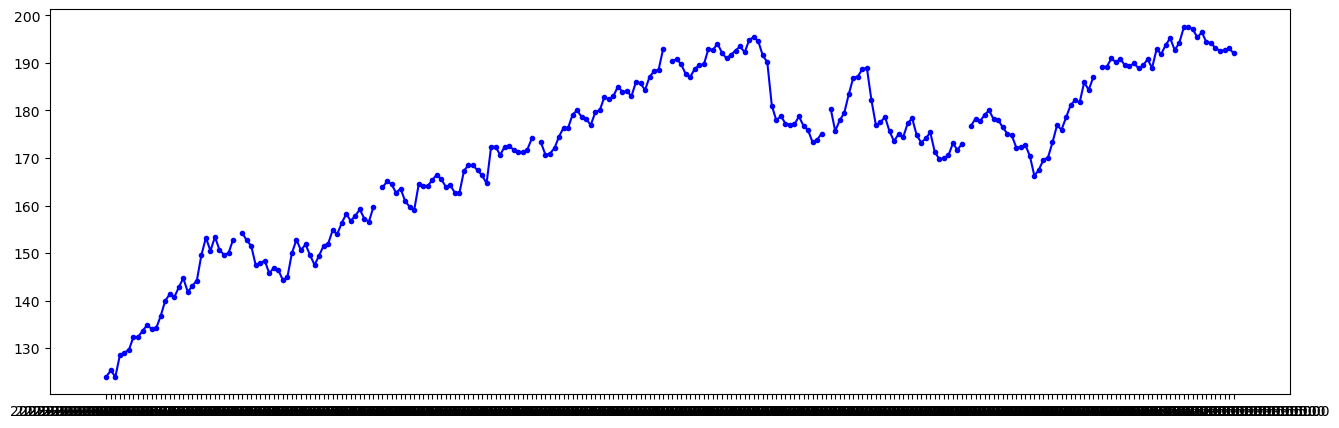

In [11]:
## Plot

import matplotlib.cbook as cbook
import matplotlib.dates as mdates

plt.figure(figsize=((16,5)))
plt.plot(df1['1day'],'.-',color='b')

plt.show()

### Make a copy of df1 and apply VAR

In [12]:
df1_imputing = df1.copy()

# Filliing NA data to apply VAR
df1_imputing['1day diff'] = df1_imputing['1day'].diff()
df1_imputing['VAR imputation'] = df1_imputing['1day diff'].ffill().bfill()
df1_imputing = df1_imputing[['1day diff','VAR imputation', 'NVDA Diff']]

# Remove the first NaN row.
df1_imputing = df1_imputing.drop(df1_imputing.index[[0]])
df1_imputing

,1day diff,VAR imputation,NVDA Diff
Date,,,
2023-01-04 00:00:00-05:00,1.279472,1.279472,4.337875
2023-01-05 00:00:00-05:00,-1.329063,-1.329063,-4.837631
2023-01-06 00:00:00-05:00,4.562416,4.562416,5.937088
2023-01-09 00:00:00-05:00,0.525650,0.525650,7.686234
2023-01-10 00:00:00-05:00,0.575287,0.575287,2.808609
...,...,...,...
2023-12-22 00:00:00-05:00,-1.077133,-1.077133,-1.599945
2023-12-26 00:00:00-05:00,-0.548569,-0.548569,4.489838
2023-12-27 00:00:00-05:00,0.099731,0.099731,1.379913


In [13]:
# Forecast missing values
def impute_missing_values(data, results,s):
    for i in range(len(data)):
        ## s="1day diff", "2day diff",..., "5day diff"
        if np.isnan(data[s].iloc[i]):  # Check if the Adj Diff Missing is np.nan
            # Get the previous available data points up to the maxlags
            data_slice = data.drop(columns = [s]).iloc[i - results.k_ar:i].values
            if len(data_slice) == results.k_ar:
                forecast = results.forecast(data_slice, steps=1)
                data[s].iloc[i] = forecast[0, 0]  # Impute the missing value using the forecast
    return data

In [14]:
## VAR
model_1 = VAR(df1_imputing.drop(columns=['1day diff']))
results_1 = model_1.fit(maxlags=15)
imputed_data_1 = impute_missing_values(df1_imputing.copy(), results_1,'1day diff')

C:\Users\teres\anaconda3\envs\data_imputation\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [15]:
imputed_data_1

,1day diff,VAR imputation,NVDA Diff
Date,,,
2023-01-04 00:00:00-05:00,1.279472,1.279472,4.337875
2023-01-05 00:00:00-05:00,-1.329063,-1.329063,-4.837631
2023-01-06 00:00:00-05:00,4.562416,4.562416,5.937088
2023-01-09 00:00:00-05:00,0.525650,0.525650,7.686234
2023-01-10 00:00:00-05:00,0.575287,0.575287,2.808609
...,...,...,...
2023-12-22 00:00:00-05:00,-1.077133,-1.077133,-1.599945
2023-12-26 00:00:00-05:00,-0.548569,-0.548569,4.489838
2023-12-27 00:00:00-05:00,0.099731,0.099731,1.379913


In [16]:
df1['1day diff'] = imputed_data_1['1day diff']

for i in range(len(df1)):
    if np.isnan(df1["1day"].iloc[i]):
        df1["1day"].iloc[i] = df1["1day diff"].iloc[i]+df1["1day"].iloc[i-1]

df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 250 entries, 2023-01-03 00:00:00-05:00 to 2023-12-29 00:00:00-05:00
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Close              250 non-null    float64
 1   1day               250 non-null    float64
 2   NVDA Diff          249 non-null    float64
 3   NVDA Daily Return  249 non-null    float64
 4   Interpolating      250 non-null    float64
 5   1day diff          249 non-null    float64
dtypes: float64(6)
memory usage: 21.8+ KB


In [17]:
mses1['VAR model'] = mean_squared_error(df1['1day'],data['Close'])*(len(df1)/(data['1day'].isnull().sum()))

In [18]:
mses1

{'Linear Interpolating': 0.679228361280242, 'VAR model': 2.4828108791045174}

## Imputing missing 2day

In [19]:
df2 = data[['Date','Close','2day']].copy()
df2 = df2.set_index('Date')
df2['NVDA Diff'] = nvda_data['Diff']
df2['NVDA Daily Return'] = nvda_data['Daily Return']
df2

,Close,2day,NVDA Diff,NVDA Daily Return
Date,,,,
2023-01-03 00:00:00-05:00,124.048042,124.048042,NaN,NaN
2023-01-04 00:00:00-05:00,125.327515,125.327515,4.337875,0.030318
2023-01-05 00:00:00-05:00,123.998451,123.998451,-4.837631,-0.032816
2023-01-06 00:00:00-05:00,128.560867,128.560867,5.937088,0.041640
2023-01-09 00:00:00-05:00,129.086517,129.086517,7.686234,0.051753
...,...,...,...,...
2023-12-22 00:00:00-05:00,193.091385,193.091385,-1.599945,-0.003266
2023-12-26 00:00:00-05:00,192.542816,192.542816,4.489838,0.009195
2023-12-27 00:00:00-05:00,192.642548,192.642548,1.379913,0.002800


In [20]:
## Baseline Model
df2['Interpolating'] = df2['2day'].interpolate(method='linear')
mses2 = {}
mses2['Linear Interpolating'] = mean_squared_error(df2['Interpolating'],df2['Close'])*(len(df2)/(data['2day'].isnull().sum()))

In [21]:
df2

,Close,2day,NVDA Diff,NVDA Daily Return,Interpolating
Date,,,,,
2023-01-03 00:00:00-05:00,124.048042,124.048042,NaN,NaN,124.048042
2023-01-04 00:00:00-05:00,125.327515,125.327515,4.337875,0.030318,125.327515
2023-01-05 00:00:00-05:00,123.998451,123.998451,-4.837631,-0.032816,123.998451
2023-01-06 00:00:00-05:00,128.560867,128.560867,5.937088,0.041640,128.560867
2023-01-09 00:00:00-05:00,129.086517,129.086517,7.686234,0.051753,129.086517
...,...,...,...,...,...
2023-12-22 00:00:00-05:00,193.091385,193.091385,-1.599945,-0.003266,193.091385
2023-12-26 00:00:00-05:00,192.542816,192.542816,4.489838,0.009195,192.542816
2023-12-27 00:00:00-05:00,192.642548,192.642548,1.379913,0.002800,192.642548


In [22]:
df2_imputing = df2.copy()

# Filliing NA data to apply VAR
df2_imputing['2day diff'] = df2_imputing['2day'].diff()
df2_imputing['VAR imputation'] = df2_imputing['2day diff'].ffill().bfill()
df2_imputing = df2_imputing[['2day diff','VAR imputation', 'NVDA Diff']]

# Remove the first NaN row.
df2_imputing = df2_imputing.drop(df2_imputing.index[[0]])

In [23]:
## VAR
model_2 = VAR(df2_imputing.drop(columns=['2day diff']))
results_2 = model_2.fit(maxlags=15)
imputed_data_2 = impute_missing_values(df2_imputing.copy(), results_2, '2day diff')

C:\Users\teres\anaconda3\envs\data_imputation\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [24]:
df2['2day diff'] = imputed_data_2['2day diff']

for i in range(len(df2)):
    if np.isnan(df2["2day"].iloc[i]):
        df2["2day"].iloc[i] = df2["2day diff"].iloc[i]+df2["2day"].iloc[i-1]

In [25]:
mses2['VAR model'] = mean_squared_error(df2['2day'],data['Close'])*(len(df2)/(data['2day'].isnull().sum()))

In [26]:
mses2

{'Linear Interpolating': 2.526317467717179, 'VAR model': 4.531567412974658}

## Imputing Missing 3day

In [27]:
## Create a dataframe that contains 3day (missing 3 data points)

df3 = data[['Date','Close','3day']].copy()
df3 = df3.set_index('Date')
df3['NVDA Diff'] = nvda_data['Diff']
df3['NVDA Daily Return'] = nvda_data['Daily Return']

## Baseline Model
df3['Interpolating'] = df3['3day'].interpolate(method='linear')
mses3 = {}
mses3['Linear Interpolating'] = mean_squared_error(df3['Interpolating'],df3['Close'])*(len(df3)/(data['3day'].isnull().sum()))


## Create imputing dataframe
df3_imputing = df3.copy()

# Filliing NA data to apply VAR
df3_imputing['3day diff'] = df3_imputing['3day'].diff()
df3_imputing['VAR imputation'] = df3_imputing['3day diff'].ffill().bfill()
df3_imputing = df3_imputing[['3day diff','VAR imputation', 'NVDA Diff']]

# Remove the first NaN row.
df3_imputing = df3_imputing.drop(df3_imputing.index[[0]])

## VAR
model_3 = VAR(df3_imputing.drop(columns=['3day diff']))
results_3 = model_3.fit(maxlags=15)
imputed_data_3 = impute_missing_values(df3_imputing.copy(), results_3, '3day diff')

df3['3day diff'] = imputed_data_3['3day diff']

for i in range(len(df3)):
    if np.isnan(df3["3day"].iloc[i]):
        df3["3day"].iloc[i] = df3["3day diff"].iloc[i]+df3["3day"].iloc[i-1]

# Compute MSE
mses3['VAR model'] = mean_squared_error(df3['3day'],data['Close'])*(len(df3)/(data['3day'].isnull().sum()))

C:\Users\teres\anaconda3\envs\data_imputation\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [28]:
mses3

{'Linear Interpolating': 1.8751985815220782, 'VAR model': 8.519949045922962}

## Imputing Missing 4day

In [29]:
## Create a dataframe that contains 4day (missing 4 data points)

df4 = data[['Date','Close','4day']].copy()
df4 = df4.set_index('Date')
df4['NVDA Diff'] = nvda_data['Diff']
df4['NVDA Daily Return'] = nvda_data['Daily Return']

## Baseline Model
df4['Interpolating'] = df4['4day'].interpolate(method='linear')
mses4 = {}
mses4['Linear Interpolating'] = mean_squared_error(df4['Interpolating'],df4['Close'])*(len(df4)/(data['4day'].isnull().sum()))


## Create imputing dataframe
df4_imputing = df4.copy()

# Filliing NA data to apply VAR
df4_imputing['4day diff'] = df4_imputing['4day'].diff()
df4_imputing['VAR imputation'] = df4_imputing['4day diff'].ffill().bfill()
df4_imputing = df4_imputing[['4day diff','VAR imputation', 'NVDA Diff']]

# Remove the first NaN row.
df4_imputing = df4_imputing.drop(df4_imputing.index[[0]])

## VAR
model_4 = VAR(df4_imputing.drop(columns=['4day diff']))
results_4 = model_4.fit(maxlags=15)
imputed_data_4 = impute_missing_values(df4_imputing.copy(), results_4, '4day diff')

df4['4day diff'] = imputed_data_4['4day diff']

for i in range(len(df4)):
    if np.isnan(df4["4day"].iloc[i]):
        df4["4day"].iloc[i] = df4["4day diff"].iloc[i]+df4["4day"].iloc[i-1]

# Compute MSE
mses4['VAR model'] = mean_squared_error(df4['4day'],data['Close'])*(len(df4)/(data['4day'].isnull().sum()))

mses4



C:\Users\teres\anaconda3\envs\data_imputation\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


{'Linear Interpolating': 3.398599024755626, 'VAR model': 17.31681330401704}

## Imputing Missing 5day

In [30]:
## Create a dataframe that contains 5day (missing 5 data points)

df5 = data[['Date','Close','5day']].copy()
df5 = df5.set_index('Date')
df5['NVDA Diff'] = nvda_data['Diff']
df5['NVDA Daily Return'] = nvda_data['Daily Return']

## Baseline Model
df5['Interpolating'] = df5['5day'].interpolate(method='linear')
mses5 = {}
mses5['Linear Interpolating'] = mean_squared_error(df5['Interpolating'],df5['Close'])*(len(df5)/(data['5day'].isnull().sum()))


## Create imputing dataframe
df5_imputing = df5.copy()

# Filliing NA data to apply VAR
df5_imputing['5day diff'] = df5_imputing['5day'].diff()
df5_imputing['VAR imputation'] = df5_imputing['5day diff'].ffill().bfill()
df5_imputing = df5_imputing[['5day diff','VAR imputation', 'NVDA Diff']]

# Remove the first NaN row.
df5_imputing = df5_imputing.drop(df5_imputing.index[[0]])

## VAR
model_5 = VAR(df5_imputing.drop(columns=['5day diff']))
results_5 = model_5.fit(maxlags=15)
imputed_data_5 = impute_missing_values(df5_imputing.copy(), results_5, '5day diff')

df5['5day diff'] = imputed_data_5['5day diff']

for i in range(len(df5)):
    if np.isnan(df5["5day"].iloc[i]):
        df5["5day"].iloc[i] = df5["5day diff"].iloc[i]+df5["5day"].iloc[i-1]

# Compute MSE
mses5['VAR model'] = mean_squared_error(df5['5day'],data['Close'])*(len(df5)/(data['5day'].isnull().sum()))

mses5

C:\Users\teres\anaconda3\envs\data_imputation\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


{'Linear Interpolating': 3.475544046464251, 'VAR model': 29.344750143590304}

## Plot

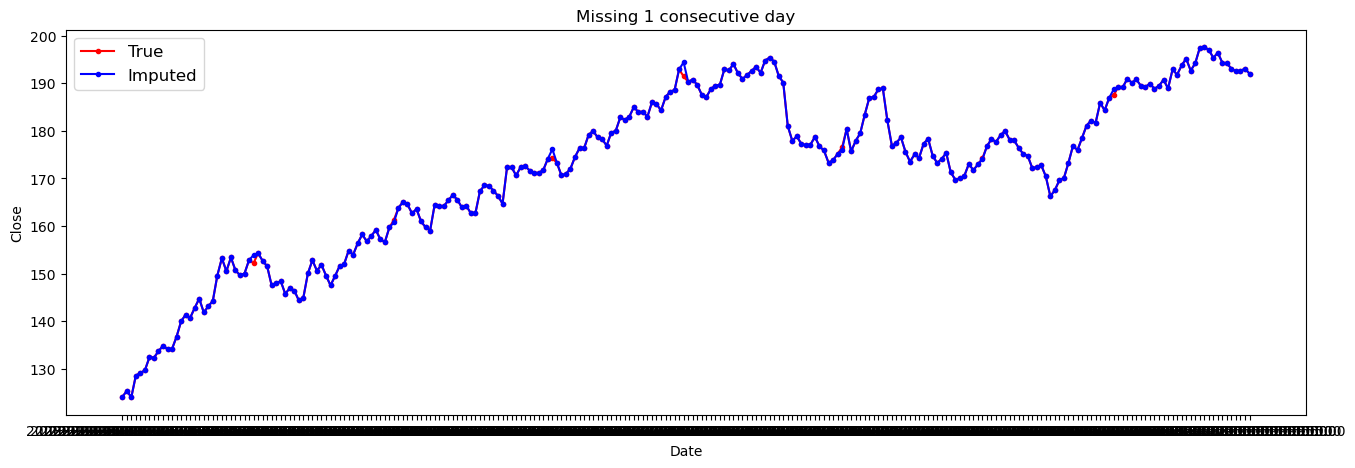

In [31]:
## Plot
import datetime

plt.figure(figsize=((16,5)))

plt.plot(data['Close'],'.-',color='r',label='True')
plt.plot(df1['1day'],'.-',color='b',label='Imputed')

plt.legend(fontsize=12)
plt.xlabel('Date')
plt.ylabel('Close')

#plt.xlim([datetime.date(2023, 10, 1), datetime.date(2023, 10, 31)])

plt.title('Missing 1 consecutive day')

plt.show()

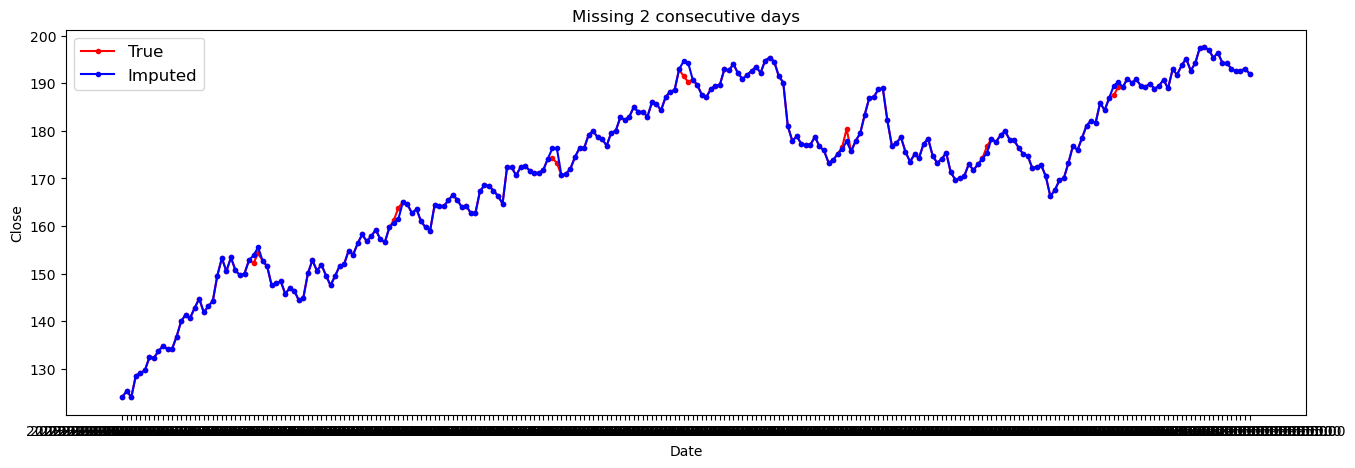

In [32]:
## Plot
plt.figure(figsize=((16,5)))

plt.plot(data['Close'],'.-',color='r',label='True')
plt.plot(df2['2day'],'.-',color='b',label='Imputed')

plt.legend(fontsize=12)
plt.xlabel('Date')
plt.ylabel('Close')

#plt.xlim([datetime.date(2023, 10, 1), datetime.date(2023, 10, 31)])

plt.title('Missing 2 consecutive days')

plt.show()

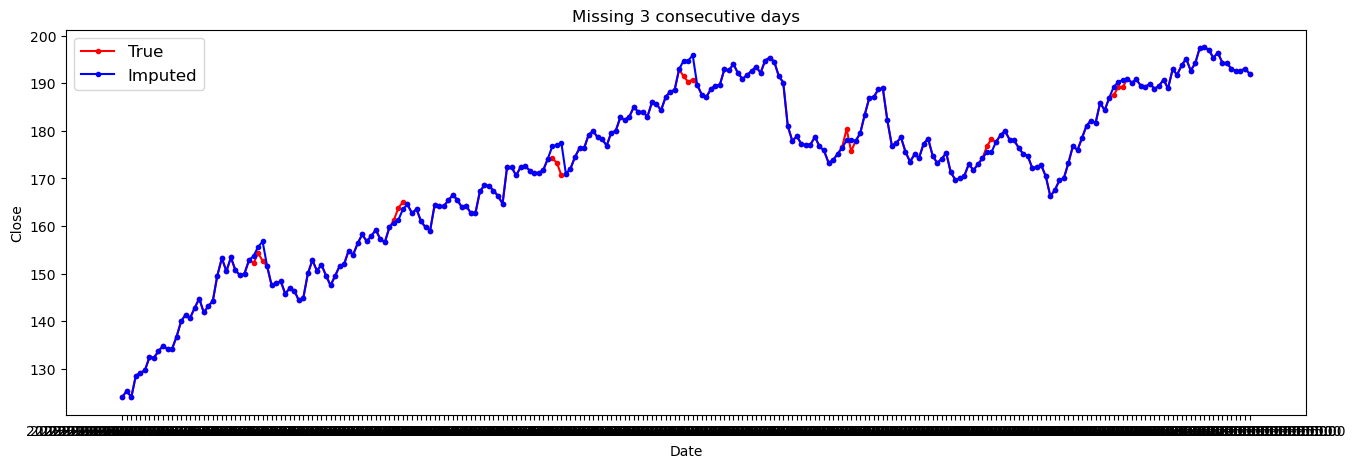

In [33]:
## Plot
plt.figure(figsize=((16,5)))

plt.plot(data['Close'],'.-',color='r',label='True')
plt.plot(df3['3day'],'.-',color='b',label='Imputed')

plt.legend(fontsize=12)
plt.xlabel('Date')
plt.ylabel('Close')

#plt.xlim([datetime.date(2023, 10, 1), datetime.date(2023, 10, 31)])

plt.title('Missing 3 consecutive days')

plt.show()

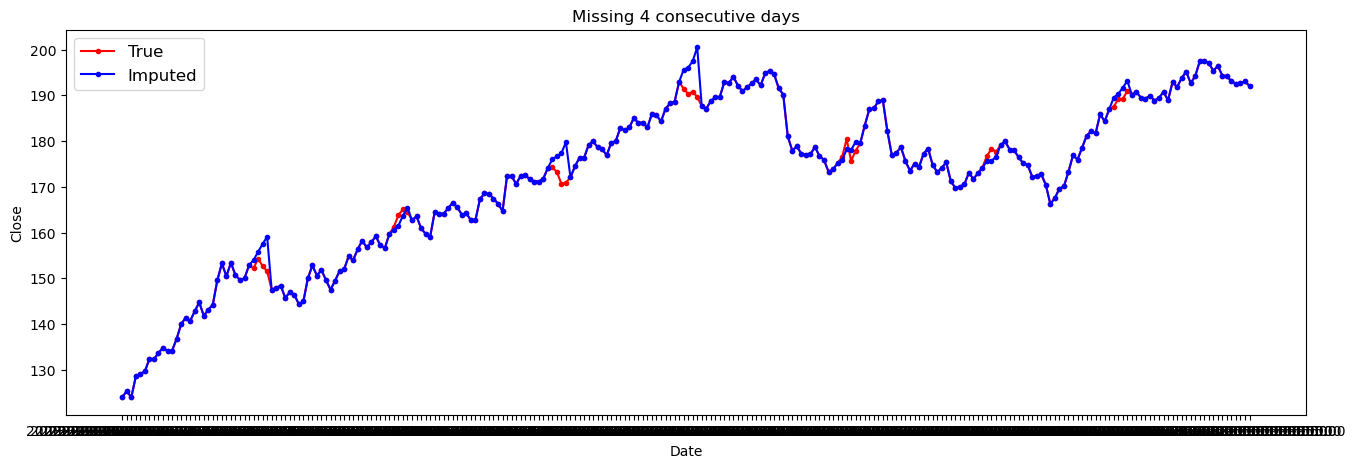

In [34]:
## Plot
plt.figure(figsize=((16,5)))

plt.plot(data['Close'],'.-',color='r',label='True')
plt.plot(df4['4day'],'.-',color='b',label='Imputed')

plt.legend(fontsize=12)
plt.xlabel('Date')
plt.ylabel('Close')

#plt.xlim([datetime.date(2023, 10, 1), datetime.date(2023, 10, 31)])

plt.title('Missing 4 consecutive days')

plt.show()

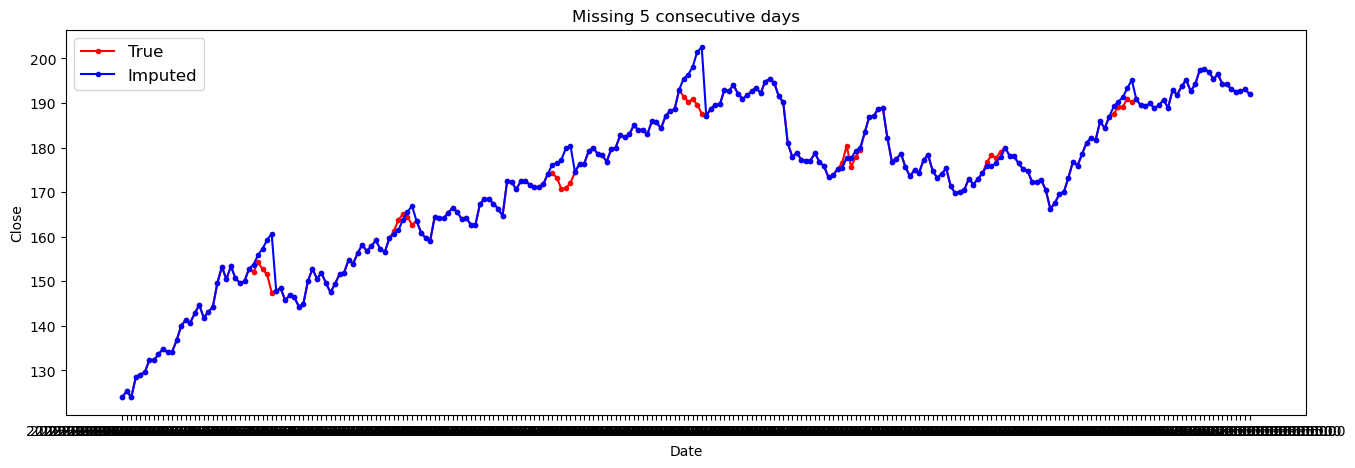

In [35]:
## Plot
plt.figure(figsize=((16,5)))

plt.plot(data['Close'],'.-',color='r',label='True')
plt.plot(df5['5day'],'.-',color='b',label='Imputed')

plt.legend(fontsize=12)
plt.xlabel('Date')
plt.ylabel('Close')

#plt.xlim([datetime.date(2023, 10, 1), datetime.date(2023, 10, 31)])

plt.title('Missing 5 consecutive days')

plt.show()

## Compare MSES

In [36]:
print('Missing 1 consecutive data')
print(mses1)
print('------------------')

print('Missing 2 consecutive data')
print(mses2)
print('------------------')

print('Missing 3 consecutive data')
print(mses3)
print('------------------')

print('Missing 4 consecutive data')
print(mses4)
print('------------------')

print('Missing 5 consecutive data')
print(mses5)
print('------------------')

Missing 1 consecutive data
{'Linear Interpolating': 0.679228361280242, 'VAR model': 2.4828108791045174}
------------------
Missing 2 consecutive data
{'Linear Interpolating': 2.526317467717179, 'VAR model': 4.531567412974658}
------------------
Missing 3 consecutive data
{'Linear Interpolating': 1.8751985815220782, 'VAR model': 8.519949045922962}
------------------
Missing 4 consecutive data
{'Linear Interpolating': 3.398599024755626, 'VAR model': 17.31681330401704}
------------------
Missing 5 consecutive data
{'Linear Interpolating': 3.475544046464251, 'VAR model': 29.344750143590304}
------------------
